<a href="https://colab.research.google.com/github/MatthewsYco/Build-Real-time-Google-Play-store-data-analytics---python/blob/main/Nullclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the Dataset

In [ ]:
import numpy as np
import pandas as pd
file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)

Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)
print("Initial Dataset:")
print(data.head())
data = data.drop_duplicates()
print("\nData After Removing all Duplicates:")
print(data.info())

# Handle Missing Values(missing numeric values with mean & missing categorical values with mode)
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
print("\nAfter Handling Missing Values:")
print(data.isnull().sum())
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)
data['Price'] = data['Price'].str.replace('$', '', regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').fillna(0).astype(float)
data['Revenue'] = data.apply(lambda row: row['Price'] * row['Installs'] if row['Type'] == 'Paid' else 0, axis=1)

# Data for Categories with More Than 50 Apps
category_counts = data['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
data = data[data['Category'].isin(valid_categories)]
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

data['High_Rated'] = data['Rating'] >= 4.0
data['Updated_Year'] = data['Last Updated'].dt.year
data['Updated_Month'] = data['Last Updated'].dt.month

print("\nProcessed Dataset:")
print(data.head())



Initial Dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art 

<ipython-input-27-c863f39471c1>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c863f39471c1>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c863f39471c1>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c863

TASK 1 :  Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

Unique values in Price column: [0 '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49' '$10.99'
 '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95' '$4.49'
 '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99' '$400.00'
 '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29'
 '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99' '$19.90'
 '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99' '$3.08'
 '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$4.29'
 '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97' '$200.00'
 '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone' '$1.20'
 '$1.04']
     Price  Installs   Revenue
234   4.99  100000.0  499000.0
235   4.99  100000.0  499000.0
290   4.99  100000.0  499000.0
291   4.99  100000.0  499000.0
427   3.99  100

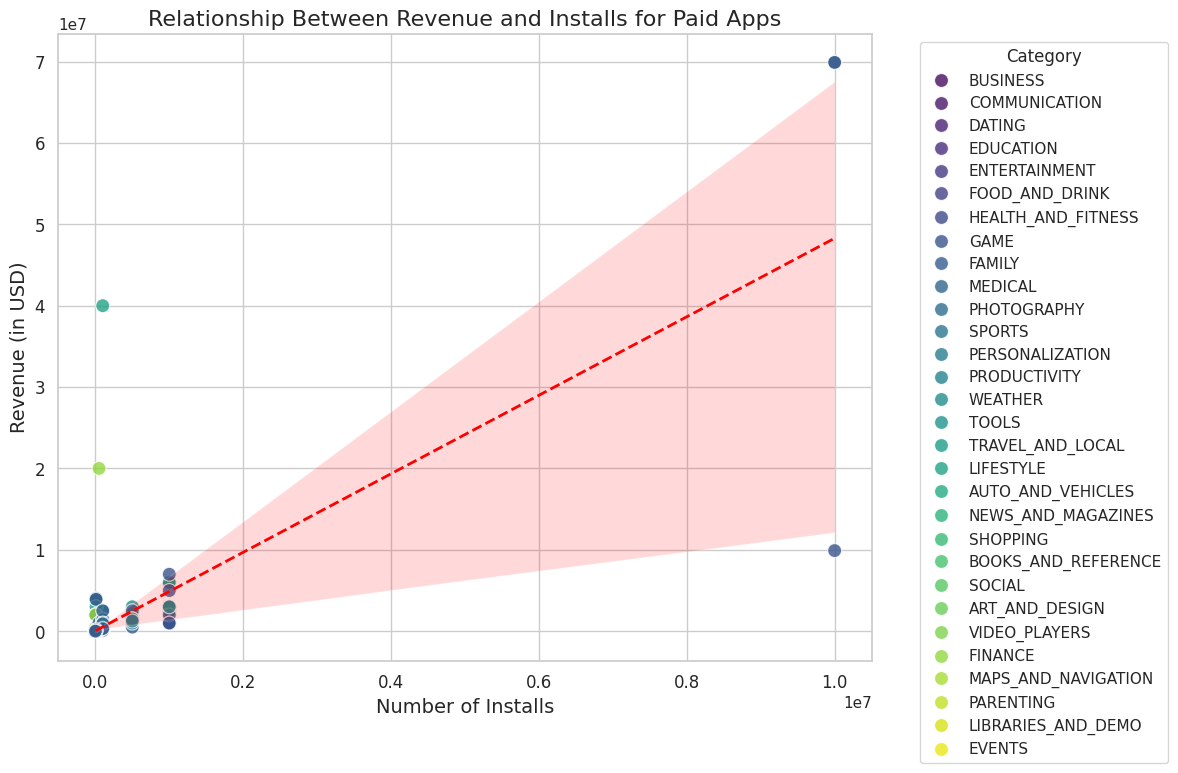

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)
print("Unique values in Price column:", data['Price'].unique())


data['Price'] = data['Price'].astype(str)  # Convert to string in case of mixed types
data['Price'] = data['Price'].str.replace('[\$,]', '', regex=True)  # Remove dollar sign
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').fillna(0)
data['Installs'] = data['Installs'].astype(str).str.replace('[\+,]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0)

# Computing revenue using price and installs
if 'Revenue' not in data.columns:
    data['Revenue'] = data['Price'] * data['Installs']

paid_apps = data[data['Price'] > 0]

print(paid_apps[['Price', 'Installs', 'Revenue']].head())
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
scatter = sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='viridis',
    alpha=0.8,
    s=100
)
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2, "linestyle": "--"}
)
plt.title("Relationship Between Revenue and Installs for Paid Apps", fontsize=16)
plt.xlabel("Number of Installs", fontsize=14)
plt.ylabel("Revenue (in USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


TASK 2: Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.

In [ ]:
import pandas as pd
import plotly.express as px

file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)
data['Installs'] = data['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)
data['Category'] = data['Category'].astype(str).fillna('')
data = data[~data['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Get the top 5 categories based on total installs
top_categories = data.groupby('Category')['Installs'].sum().nlargest(5).index
filtered_data = data[data['Category'].isin(top_categories)].copy()
filtered_data.loc[:, 'Country'] = "Global"
fig = px.choropleth(
    filtered_data,
    locations="Country",
    locationmode="country names",
    color="Installs",
    hover_name="Category",
    title="Global Installs by App Category",
    color_continuous_scale="Viridis"
)
fig.show()


We are also using a Treemap and Bar Chart because we do not have country-level data. The Treemap helps in showing the hierarchical distribution of app categories, while the Bar Chart provides a clear comparison of installs among the top categories.
All conditions are satisfied, aprat from the time constraint beacuse we dont have a data regarding the time


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)
data['Installs'] = data['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)
data['Category'] = data['Category'].astype(str).fillna('')
data = data[~data['Category'].str.startswith(('A', 'C', 'G', 'S'))]
top_categories = data.groupby('Category')['Installs'].sum().nlargest(5).index
filtered_data = data[data['Category'].isin(top_categories)].copy()
filtered_data = filtered_data[filtered_data['Installs'] > 0]


fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Treemap of App Categories", "Bar Chart of Top Categories"),
    specs=[[{"type": "treemap"}, {"type": "xy"}]]  # Specify types for each subplot
)

# Treemap Visualization
treemap = px.treemap(
    filtered_data,
    path=["Category", "App"],
    values="Installs",
    color="Installs",
    color_continuous_scale="Viridis"
)

# Bar Chart Visualization
bar_chart = px.bar(
    filtered_data.groupby("Category")["Installs"].sum().reset_index(),
    x="Category",
    y="Installs",
    text="Installs",
    color="Category",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.add_trace(treemap.data[0], row=1, col=1)
for trace in bar_chart.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(
    title_text="Comparison of App Categories: Treemap & Bar Chart",
    showlegend=False,
    height=600,
    width=1200
)
fig.show()


 TASK 3: Create a violin plot to visualize the distribution of ratings for each app category, but only include categories with more than 50 apps and app name should contain letter “C” and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.

In [ ]:
import pandas as pd
import plotly.express as px

file_path = '/content/drive/MyDrive/NULLCLASS/Play-Store-Data.xlsx'
data = pd.read_excel(file_path)

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
filtered_data = data[data['App'].str.contains('C', case=False, na=False)]
filtered_data = filtered_data[filtered_data['Reviews'] > 10]
filtered_data = filtered_data[filtered_data['Rating'] < 4.0]

category_counts = filtered_data['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
filtered_data = filtered_data[filtered_data['Category'].isin(valid_categories)]

# Violin Plot
fig = px.violin(
    filtered_data,
    x="Category",
    y="Rating",
    box=True,
    points="all",
    hover_data=["App"],
    title="Distribution of Ratings for Each App Category"
)
fig.show()
